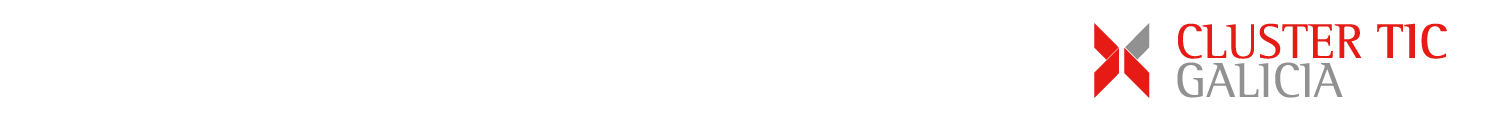
<a name = "inicio"></a>

<div style="font-size: 50px;text-align: center;height:70px;line-height: 60px;padding:10px;margin:10px 0 0 0;">Otras funciones</div>

1. [Funciones matemáticas](#Funciones-matemáticas)
1. [Funciones estadísticas](#Funciones-estadísticas)
1. [Funciones de conjuntos](#Funciones-de-conjuntos)
1. [Funciones para arrays booleanos](#Funciones-para-arrays-booleanos)
1. [Funciones de ordenación, búsqueda y recuento](#Funciones-de-ordenación,-búsqueda-y-recuento)
1. [Vectorización de funciones](#Vectorización-de-funciones)

In [1]:
import numpy as np

Numpy incluye un conjunto de funciones matemáticas y estadísticas que pueden ser aplicadas a todo un array, a una dimensión de un array o a varias dimensiones de un array. Todas estas funciones aceptan como argumento de entrada un array NumPy o una estructura "tipo array" (lista, tupla...):

# Funciones matemáticas

De hecho vamos a comenzar, no con funciones, sino con variables:

### numpy.pi

**np.pi** nos devuelve el valor de *pi*:

In [2]:
np.pi

3.141592653589793

### numpy.e

La variable **np.e** devuelve el valor de la constante de Euler:

In [3]:
np.e

2.718281828459045

### numpy.nan

Esta variable nos devuelve una representación de un valor *Not a Number*:

In [4]:
np.nan

nan

### numpy.sum()

https://docs.scipy.org/doc/numpy/reference/generated/numpy.sum.html

La función **np.sum()** devuelve la suma de los valores de un array a lo largo de los ejes especificados:

In [5]:
m = np.array([[10, 8, 15], [20, 10, 8]])
m

array([[10,  8, 15],
       [20, 10,  8]])

Esta funcionalidad existe como función y como método:

In [6]:
np.sum(m, axis = 0)

array([30, 18, 23])

### numpy.nansum()

https://numpy.org/doc/stable/reference/generated/numpy.nansum.html

La función *np.sum()* devuelve *NaN* si alguno de los valores del array es *NaN*. Si se desea obtener la suma del resto de valores, deberemos usar la función **np.nansum()**:

In [7]:
a = np.array([2, 6, np.nan, 4])

In [8]:
np.sum(a)

nan

In [9]:
np.nansum(a)

12.0

### numpy.cumsum()

https://docs.scipy.org/doc/numpy/reference/generated/numpy.cumsum.html

La función **numpy.cumsum()** devuelve la suma acumulada de los valores de un array a lo largo de los ejes especificados:

In [10]:
m = np.array([[1, 3, 5, 2], [-4, 2, 0, 3], [4, 2, 2, 5]])
m

array([[ 1,  3,  5,  2],
       [-4,  2,  0,  3],
       [ 4,  2,  2,  5]])

Si no se especifica el eje, se aplana el array:

In [11]:
np.cumsum(m)

array([ 1,  4,  9, 11,  7,  9,  9, 12, 16, 18, 20, 25])

pero podemos especificar el eje:

In [12]:
np.cumsum(m, axis = 0)

array([[ 1,  3,  5,  2],
       [-3,  5,  5,  5],
       [ 1,  7,  7, 10]])

In [13]:
np.cumsum(m, axis = 1)

array([[ 1,  4,  9, 11],
       [-4, -2, -2,  1],
       [ 4,  6,  8, 13]])

Esta funcionalidad existe como función y como método:

In [14]:
m.cumsum(axis = 1)

array([[ 1,  4,  9, 11],
       [-4, -2, -2,  1],
       [ 4,  6,  8, 13]])

### numpy.nancumsum()

https://numpy.org/doc/stable/reference/generated/numpy.nancumsum.html

Y también en este caso existe una función "segura" frente a la existencia de valores *NaN*: **np.nancumsum()**:

In [15]:
a = np.array([2, 6, np.nan, 4, 2, np.nan, 8, 2])

Obsérvese que la función original *np.cumsum()* devuelve el valor acumulado *NaN* a partir del primer valor *NaN*:

In [16]:
np.cumsum(a)

array([ 2.,  8., nan, nan, nan, nan, nan, nan])

La función *np.nancumsum()*, por el contrario, reemplaza los *NaN* por ceros:

In [17]:
np.nancumsum(a)

array([ 2.,  8.,  8., 12., 14., 14., 22., 24.])

<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

# Funciones estadísticas

### numpy.mean()

https://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html

La función **np.mean()** calcula la media aritmética de los valores del array a lo largo de los ejes especificados. Para ver cómo se aplica, partamos del siguiente array de tres dimensiones:

In [18]:
a = np.arange(1, 28).reshape(3, 3, 3)
print(a.shape)
a

(3, 3, 3)


array([[[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9]],

       [[10, 11, 12],
        [13, 14, 15],
        [16, 17, 18]],

       [[19, 20, 21],
        [22, 23, 24],
        [25, 26, 27]]])

Aplicamos la función al array sin especificar el eje, con lo que la función se aplica a todos los elementos del array (como si se aplanase el array):

In [19]:
np.mean(a)

14.0

Especifiquemos ahora que la media se aplique solo al eje 0 (eje vertical sobre el que se encuentran, por ejemplo, los valores 1, 10 y 19 del array):

In [20]:
# RESULTADO 1
np.mean(a, axis = 0)

array([[10., 11., 12.],
       [13., 14., 15.],
       [16., 17., 18.]])

Obtenemos un array de dos dimensiones, resultado de "agregar" las diferentes columnas de datos aplicando la función **np.mean()**. Así, para la columna formada por los números 1, 10 y 19 ya mencionada, el valor medio es 10. El eje horizontal de este resultado es el correspondiente al eje de profundidad (eje 2) del array original, y el eje vertical de este resultado es el correspondiente al eje x (eje 1) del array original:

![Función np.mean](https://www.interactivechaos.com/sites/default/files/inline-images/tutorial_numpy_function_mean_05.JPG)

Si aplicamos la función sobre dos ejes, el 0 y el 2, por ejemplo, el resultado es el siguiente:

In [21]:
np.mean(a, axis = (0, 2))

array([11., 14., 17.])

Ahora la función devuelve un array de una dimensión, que puede ser visto como la agregación del resultado anterior a lo largo del eje 2 del array original (eje representado en *RESULTADO 1* a lo largo de su eje horizontal).

Esta funcionalidad existe como función y como método:

In [22]:
a.mean(axis = (0, 2))

array([11., 14., 17.])

### numpy.nanmean()

https://numpy.org/doc/stable/reference/generated/numpy.nanmean.html

La función *np.mean()* devuelve el valor *NaN* si alguno de los valores del array es *NaN*. Si deseamos obviar esos *NaN* y obtener el valor medio del resto de valores, deberemos utilizar la función **np.nanmean()**:

In [23]:
a = np.array([2, 6, np.nan, 4])

In [24]:
np.mean(a)

nan

In [25]:
np.nanmean(a)

4.0

### numpy.median()

https://docs.scipy.org/doc/numpy/reference/generated/numpy.median.html

La función **numpy.median()** devuelve la mediana de los valores de un array a lo largo de los ejes especificados:

In [26]:
a = np.array([1, 5, 6, 6, 7, 7, 7, 10, 20, 51])
np.median(a)

7.0

Solo está disponible como función.

### numpy.nanmedian()

https://numpy.org/doc/stable/reference/generated/numpy.nanmedian.html

La función *np.median()* tampoco soporta los valores *NaN*. Si queremos calcular la mediana de los valores que no son *NaN*, deberemos usar la función **np.nanmedian()**:

In [27]:
a = np.array([2, 6, np.nan, 4])

In [28]:
np.median(a)

nan

In [29]:
np.nanmedian(a)

4.0

### numpy.average()

https://docs.scipy.org/doc/numpy/reference/generated/numpy.average.html

La función **numpy.average()** devuelve la media aritmética ponderada de los valores de un array a lo largo de los ejes especificados. Los pesos a utilizar se indican con el parámetro **weights**.

Si no se especifican los pesos, la función asume que todos los valores sobre los que se va a aplicar el cálculo tienen idéntico peso:

In [30]:
a = np.array([4, 1, 3, 5])
np.average(a)

3.25

en cuyo caso, lógicamente, el resultado obtenido coincide con el valor medio:

In [31]:
np.mean(a)

3.25

Si se especifican los pesos, el resultado es la media ponderada de los valores:

In [32]:
a = np.array([4, 1, 3, 5])
w = [2, 1, 3, 4]
np.average(a, weights = w)

3.8

Solo está disponible como función.

### numpy.var()

https://docs.scipy.org/doc/numpy/reference/generated/numpy.var.html

La función **numpy.var()** devuelve la varianza de los valores de un array a lo largo de los ejes especificados:

In [33]:
m = np.array([[10, 8, 15], [20, 10, 8]])
m

array([[10,  8, 15],
       [20, 10,  8]])

In [34]:
np.var(m, axis = 0)

array([25.  ,  1.  , 12.25])

Esta funcionalidad existe como función y como método:

In [35]:
m.var(axis = 0)

array([25.  ,  1.  , 12.25])

### numpy.nanvar()

https://numpy.org/doc/stable/reference/generated/numpy.nanvar.html

La versión equivalene que soporta la presencia de valores *NaN* es **np.nanvar()**:

In [36]:
a = np.array([2, 6, np.nan, 4])

In [37]:
np.var(a)

nan

In [38]:
np.nanvar(a)

2.6666666666666665

### numpy.std()

https://docs.scipy.org/doc/numpy/reference/generated/numpy.std.html

La función **numpy.std()** devuelve la desviación estándar de los valores un array a lo largo de los ejes especificados:

In [39]:
m = np.array([[10, 8, 15], [20, 10, 8]])
m

array([[10,  8, 15],
       [20, 10,  8]])

In [40]:
np.std(m, axis = 0)

array([5. , 1. , 3.5])

Esta funcionalidad existe como función y como método:

In [41]:
m.std(axis = 0)

array([5. , 1. , 3.5])

### numpy.nanstd()

https://numpy.org/doc/stable/reference/generated/numpy.nanstd.html

Nuevamente, para calcular la desviación estándar de aquellos valores que no sean *NaN*, deberemos usar la función **np.nanstd()**:

In [42]:
a = np.array([2, 6, np.nan, 4])

In [43]:
np.std(a)

nan

In [44]:
np.nanstd(a)

1.632993161855452

### numpy.cov()

Esta función devuelve la matriz de covarianza entre dos o más conjuntos de datos. Por defecto, cada fila se considera una variable o característica, y cada columna una observación o muestra. Este comportamiento es configurable mediante el parámetro **rowvar**:

In [45]:
m = np.array([[4, 1, 3, 5], [4, 3, 6, 7]])
m

array([[4, 1, 3, 5],
       [4, 3, 6, 7]])

In [46]:
np.cov(m)

array([[2.91666667, 2.33333333],
       [2.33333333, 3.33333333]])

La diagonal del resultado obtenido contiene la varianza de cada una de las filas del array *m*. Los valores restantes de índice (i, j) contienen la covarianza de las filas *i* y *j*.

Si pasamos a la función dos arrays unidimensionales:

In [47]:
m = np.array([4, 1, 3, 5])
n = np.array([4, 3, 6, 7])

In [48]:
np.cov(m, n)

array([[2.91666667, 2.33333333],
       [2.33333333, 3.33333333]])

vemos que el resultado es el mismo.

### numpy.corrcoef()

https://docs.scipy.org/doc/numpy/reference/generated/numpy.corrcoef.html

La función **numpy.corrcoef()** devuelve el *coeficiente de correlación de Pearson*, también conocido como *R de Pearson* o *coeficiente de correlación de producto-momento de Pearson*, entre las filas de un array bidimensional o entre dos arrays unidimensionales.

Comencemos con el primero de los casos: cálculo del coeficiente de correlación de Pearson entre las filas de un array bidimensional:

In [49]:
m = np.array([[4, 1, 3, 5], [4, 3, 6, 7]])
m

array([[4, 1, 3, 5],
       [4, 3, 6, 7]])

También en este caso, por defecto, cada fila se considera una variable o característica, y cada columna una observación o muestra. Este comportamiento es configurable mediante el parámetro **rowvar**.

In [50]:
np.corrcoef(m)

array([[1.        , 0.74833148],
       [0.74833148, 1.        ]])

*np.corrcoef()* devuelve la matriz de correlación: matriz 2D donde cada elemento *(i, j)* representa el coeficiente de correlación entre la i-ésima y la j-ésima variable del conjunto de entrada.

Si los valores a los que aplicar la función se encuentran en arrays unidimensionales, el resultado es el mismo:

In [51]:
a = np.array([4, 1, 3, 5])
b = np.array([4, 3, 6, 7])
np.corrcoef(a, b)

array([[1.        , 0.74833148],
       [0.74833148, 1.        ]])

Por supuesto, el array de entrada puede tener más de dos filas:

In [52]:
m = np.array([[4, 1, 3, 5], [4, 3, 6, 7], [2, 2, 5, 4]])
m

array([[4, 1, 3, 5],
       [4, 3, 6, 7],
       [2, 2, 5, 4]])

In [53]:
np.corrcoef(m)

array([[1.        , 0.74833148, 0.35783003],
       [0.74833148, 1.        , 0.85201287],
       [0.35783003, 0.85201287, 1.        ]])

En este caso, la matriz de correlación devuelta tiene unas dimensiones de (3, 3).

Esta funcionalidad solo está disponible como función.

### numpy.percentile()

https://numpy.org/doc/stable/reference/generated/numpy.percentile.html

La función **np.percentile()** devuelve el q-ésimo percentil de los datos a lo largo del eje especificado. *q* deberá ser un valor antre 0 y 100. Para probarla, generemos un array unidimensional de valores aleatorios extraídos de una distribución gaussiana de valor medio 10 y desviación estándar 2:

In [54]:
generator = np.random.Generator(np.random.PCG64())
a = generator.normal(10, 2, size = 1000)

Veamos cuál es el valor del percentil 30:

In [55]:
np.percentile(a, 30)

8.805021911990327

También podemos extraer varios percentiles pasando a *q* un iterable con los valores en los que estamos interesados:

In [56]:
q = np.arange(0, 101, 10)
q

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100])

In [57]:
np.percentile(a, q)

array([ 4.60727884,  7.32861117,  8.11709335,  8.80502191,  9.44939129,
        9.91147906, 10.43790994, 10.98236229, 11.65696464, 12.48066712,
       15.2247813 ])

Este ejemplo se ha basado en un array unidimensional. Si el array tuviese más de una dimensión, podemos especificar el eje a lo largo del cual queremos realizar el cálculo:

In [58]:
a = np.arange(24).reshape(4, 6)
a

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23]])

Los percentiles 30 de los datos contenidos en columnas es:

In [59]:
np.percentile(a, 25, axis = 0)

array([4.5, 5.5, 6.5, 7.5, 8.5, 9.5])

Y el mismo percentil de los datos contenidos en filas:

In [60]:
np.percentile(a, 25, axis = 1)

array([ 1.25,  7.25, 13.25, 19.25])

### numpy.nanpercentile()

https://numpy.org/doc/stable/reference/generated/numpy.nanpercentile.html

Y también en en este caso tenemos una función que ignora los posibles *NaN's* que existan: **np.nanpercentile()**. Para probarla, introducimos un *NaN* en nuestros datos:

In [61]:
a = generator.normal(10, 2, size = 1000)
a[1] = np.NaN

In [62]:
np.percentile(a, 30)

nan

In [63]:
np.nanpercentile(a, 30)

8.886031680711712

### np.solve()

La función **np.linalg.solve** resuelve un sistema de ecuaciones lineales. Es decir, dadas una matriz de coeficientes *A* y un vector de términos independientes *b*, encuentra el vector *x* que satisface la ecuación $Ax = b$.

Si *b* es un vector, *x* también será un vector. Si *b* es una matriz, *x* será una matriz con la misma cantidad de columnas que *b*, donde cada columna es la solución al sistema correspondiente a la columna de *b*.

Por ejemplo, supongamos que quieres resolver el siguiente sistema de ecuaciones lineales:

$3x + y = 9$

$x + 2y = 8$

En este caso, la matriz de coeficientes es:

In [64]:
A = np.array([[3, 1], [1, 2]])
A

array([[3, 1],
       [1, 2]])

y el vector $b$ de términos independientes:

In [65]:
b = np.array([9, 8])
b

array([9, 8])

Para resolver el sistema de ecuaciones no tendríamos más que ejecutar la siguiente función:

In [66]:
np.linalg.solve(A, b)

array([2., 3.])

### numpy.digitize()

https://numpy.org/doc/stable/reference/generated/numpy.digitize.html

La función **np.digitize()** sirve para categorizar datos en *bins*. Por ejemplo, supongamos que partimos de los siguientes valores:

In [67]:
a = np.array([2, 3, 3, 5, 5, 8, 8, 9, 11])

Podríamos desear agruparlos en, por ejemplo, tres *bins* con los siguientes límites:

In [68]:
bins = np.array([0, 3, 6, 9, 12])

Por defecto, el primer *bin* sería el correspondiente al rango [0, 3), el segundo el correspondiente al rango [3, 6), etc. Obsérvese que se trata de rangos cerrados por la izquierda y abiertos por la derecha. Este comportamiento es configurable.

*np.digitize()* va a devolver un array de la misma forma que el array *a*, pero conteniendo los índices de los *bins* a los que cada valor pertenece:

In [69]:
np.digitize(a, bins)

array([1, 2, 2, 2, 2, 3, 3, 4, 4], dtype=int64)

<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

# Funciones de conjuntos

NumPy ofrece algunas funciones básicas de conjuntos para arrays unidimensionales:

### numpy.unique()

https://docs.scipy.org/doc/numpy/reference/generated/numpy.unique.html

Esta función devuelve un array ordenado con los elementos únicos del array pasado como argumento:

In [70]:
a = np.array([2, 4, 2, 7, 6, 7, 2])
a

array([2, 4, 2, 7, 6, 7, 2])

In [71]:
np.unique(a)

array([2, 4, 6, 7])

### numpy.union1d()

https://docs.scipy.org/doc/numpy/reference/generated/numpy.union1d.html

La función **np.union1d()** devuelve un array unidimensional ordenado con los elementos resultantes de unir los arrays indicados considerados como conjuntos:

In [72]:
a = np.array([4, 1, 3])
b = np.array([1, 2, 2, 5])
np.union1d(a, b)

array([1, 2, 3, 4, 5])

### numpy.intersect1d()

La función **numpy.intersect1d()** devuelve un array ordenado con los valores únicos de la intersección de las estructuras de entrada:

https://docs.scipy.org/doc/numpy/reference/generated/numpy.intersect1d.html

In [73]:
a = np.array([4, 1, 3, 4])
b = np.array([1, 2, 5, 3])
np.intersect1d(a, b)

array([1, 3])

### numpy.setdiff1d()

https://docs.scipy.org/doc/numpy/reference/generated/numpy.setdiff1d.html

La función **numpy.setdiff1d()** devuelve un array ordenado con los valores únicos del resultado de evaluar *a* menos *b*, siendo *a* y *b* las estructuras de entrada:

In [74]:
a = np.array([4, 1, 3, 3])
b = np.array([1, 2, 5, 2])
np.setdiff1d(a, b)

array([3, 4])

### numpy.setxor1d()

https://docs.scipy.org/doc/numpy/reference/generated/numpy.setxor1d.html

La función **numpy.setxor1d()** devuelve un array ordenado con los valores únicos del conjunto de elementos que pertenecen a "a" o a "b", pero no a ambos, siendo a y b los arrays de entrada:

In [75]:
a = np.array([4, 1, 2])
b = np.array([1, 2, 5])
np.setxor1d(a, b)

array([4, 5])

### numpy.isin()

https://docs.scipy.org/doc/numpy/reference/generated/numpy.isin.html

La funcion **numpy.isin** permite determinar si los elementos de un array están contenidos en otro array o secuencia. Devuelve un array de booleanos del mismo tamaño que el primer array proporcionado, donde cada elemento indica si ese valor está presente en el segundo array:

In [76]:
a = np.array([[4, 1, 3], [2, 3, 5]])
a

array([[4, 1, 3],
       [2, 3, 5]])

In [77]:
b = np.array([2, 3, 4, 2])
b

array([2, 3, 4, 2])

In [78]:
np.isin(a, b)

array([[ True, False,  True],
       [ True,  True, False]])

<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

# Funciones para arrays booleanos

En muchas funciones, los booleanos *True* y *False* son interpretandos como 1 y 0, respectivamente, lo que hace que frecuentemente sean utilizados para, por ejemplo, realizar recuentos u operaciones relativas a los elementos que cumplen cierta condición.

Por ejemplo, podemos calcular el número de elementos de un array mayores que cero:

In [79]:
a = np.array([-2, 0, -1, 5, 3, -2])

In [80]:
a > 0

array([False, False, False,  True,  True, False])

In [81]:
(a > 0).sum()

2

En este caso, la expresión a > 0 devuelve un array de booleanos al que puede aplicarse la función **numpy.sum()**. Los paréntesis se utilizan para especificar la precedencia de los operadores a aplicar (si no se utilizasen se intentaría calcularía "*0.sum()*" antes que la comparación).

Siguiendo con el mismo ejemplo, podemos calcular el porcentaje de elementos mayores que cero de forma semejante:

In [82]:
(a > 0).mean()

0.3333333333333333

### numpy.all()

https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.all.html

Esta función devuelve *True* cuando todos los valores a lo largo del eje indicado del array son *True*. Si no se especifica el eje, se aplana el array.

In [83]:
a = np.array([True, False, True, True, False])
print(a.all())

False


In [84]:
a = np.array([True, True, True, True, True])
a.all()

True

Si aplicamos la función a un array de dos dimensiones:

In [85]:
a = np.array([[True, True, True], [False, True, False], [True, True, False]])
a

array([[ True,  True,  True],
       [False,  True, False],
       [ True,  True, False]])

In [86]:
np.all(a, axis = 0)

array([False,  True, False])

In [87]:
np.all(a, axis = 1)

array([ True, False, False])

Como ya sabemos, los números diferentes a cero se interpretan como *True*, y aquellos con valor 0, como *False*, con lo que la función **all** puede ser también usada para evaluar cuándo los elementos de un array son o no distintos a cero:

In [88]:
a = np.array([3, -2, 0, 4, 7])
np.all(a)

False

In [89]:
a = np.array([3, -2, 1, 4, 7])
np.all(a)

True

Obsérvese que cuando el array está vacío, el método devuelve el valor lógico *True*:

In [90]:
a = np.array([])
np.all(a)

True

Esta funcionalidad está disponible como función y como método:

In [91]:
a = np.array([3, -2, 1, 4, 7])
a.all()

True

### numpy.any()

https://docs.scipy.org/doc/numpy/reference/generated/numpy.any.html

Esta función devuelve *True* cuando algún valor a lo largo del eje indicado del array es *True* (pero tiene que haber al menos uno). Si no se especifica el eje, se aplana el array:

In [92]:
a = np.array([False, False, False, False, False])
np.any(a)

False

In [93]:
a = np.array([False, False, False, True, False])
np.any(a)

True

In [94]:
a = np.array([True, True, True, True, True])
np.any(a)

True

Si el array está vacío, la función devuelve el valor lógico *False*:

In [95]:
a = np.array([])
np.any(a)

False

Apliquemos la función a un array bidimensional:

In [96]:
a = np.array([[True, True, False, False], [False, False, False, False]])
a

array([[ True,  True, False, False],
       [False, False, False, False]])

In [97]:
np.any(a, axis = 0)

array([ True,  True, False, False])

In [98]:
np.any(a, axis = 1)

array([ True, False])

Esta funcionalidad está disponible como función y como método:

In [99]:
a.any(axis = 1)

array([ True, False])

<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

# Funciones de ordenación, búsqueda y recuento

### numpy.argmax()

https://docs.scipy.org/doc/numpy/reference/generated/numpy.argmax.html

La función **numpy.argmax()** devuelve los índices de los mayores valores del array a lo largo del eje indicado. Si no se especifica el eje, se aplana el array.

In [100]:
a = np.array([4, 1, 3, 5])
np.argmax(a)

3

En el ejemplo anterior partimos un sencillo array unidimensional. El valor máximo es 5 y se encuentra en el índice 3, valor que es el devuelto por la función.

En este segundo ejemplo partimos del siguiente array bidimensional:

In [101]:
m = np.array([[4, 1, 5, 3], [2, 3, 4, 7]])
m

array([[4, 1, 5, 3],
       [2, 3, 4, 7]])

Como se ha comentado, si no se especifica el eje, se aplana:

In [102]:
np.argmax(m)

7

Podemos obtener los índices de los máximos en cada columna (en el eje 0) de la siguiente forma:

In [103]:
np.argmax(m, axis = 0)

array([0, 1, 0, 1], dtype=int64)

Efectivamente, en la primera columna tenemos los valores 4 y 2, el mayor es el 4 y está en el índice 0 (de filas).

Para calcular los índices de los máximos por fila bastaría con cambiar el valor del parámetro *axis*:

In [104]:
np.argmax(m, axis = 1)

array([2, 3], dtype=int64)

Esta funcionalidad existe como función y como método:

In [105]:
m.argmax(axis = 1)

array([2, 3], dtype=int64)

<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

### numpy.argmin()

https://docs.scipy.org/doc/numpy/reference/generated/numpy.argmin.html

La función **numpy.argmin()** devuelve los índices de los menores valores del array a lo largo del eje indicado. Si no se especifica el eje, se aplana el array.

In [106]:
m

array([[4, 1, 5, 3],
       [2, 3, 4, 7]])

In [107]:
np.argmin(m)

1

In [108]:
np.argmin(m, axis = 0)

array([1, 0, 1, 0], dtype=int64)

In [109]:
np.argmin(m, axis = 1)

array([1, 0], dtype=int64)

Esta funcionalidad existe como función y como método:

In [110]:
m.argmin(axis = 1)

array([1, 0], dtype=int64)

### numpy.where()

https://docs.scipy.org/doc/numpy/reference/generated/numpy.where.html

La función **numpy.where()** acepta como argumentos de entrada una condición y dos estructuras tipo array, *a* e *b*, y devuelve valores de *a* o de *b* en función de que se cumpla o no la condición: Si se cumple, se devuelve el valor de *a*. Si no se cumple, el de *b*.

En este ejemplo partimos de dos sencillas listas (*a* e *b*) y otra (*c*) con la condición:

In [111]:
a = [1, 3, 5]
b = [2, 4, 6]
c = [True, False, True]
np.where(c, a, b)

array([1, 4, 5])

El resultado ha incluido el primer y tercer elemento de la lista *a* y el segundo de la lista *b*, tal y como indican los elementos de la lista *c*.

En este ejemplo hemos declarado explícitamente los valores de la condición pero, frecuentemente, ésta depende del valor de otras variables, o incluso de los valores de *a* o de *b*. Por ejemplo, supongamos que deseamos extraer los elementos de *a* cuando éstos sean mayores que 2, y los elementos de *b* en el resto de casos. Podríamos hacerlo con el siguiente código:

In [112]:
a = np.array([1, 3, 5])
b = np.array([2, 4, 6])
c = a > 2
np.where(c, a, b)

array([2, 3, 5])

Obsérvese cómo, en este caso, las variables *a* y *b* han tenido que ser convertidas en arrays NumPy pues, de otra forma, la comparación *a* > 2 daría un error (la comparación no está soportada entre listas y escalares ¡esa es exactamente la funcionalidad ofrecida por NumPy!).

En la práctica, frecuentemente se obvia la creación de la variable intermedia *c*, definiéndose la condición directamente en la función *where()*:

In [113]:
a = np.array([1, 3, 5])
b = np.array([2, 4, 6])
np.where(a > 2, a, b)

array([2, 3, 5])

Podríamos interpretar esta última instrucción como "*donde a sea mayor que 2, devuelve el valor de a. Si no, devuelve el valor de b*".

<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

# Vectorización de funciones

https://docs.scipy.org/doc/numpy/reference/generated/numpy.vectorize.html

Una función muy útil es la función **numpy.vectorize()**. Permite crear una función vectorizada a partir de una que no lo es, lo que nos permite aplicar esta última a un array.

Pongamos un ejemplo sencillo. Imaginemos una función que acepta dos números y devuelve la diferencia entre ellos, restando siempre del mayor el menor:

In [114]:
def difference_scalar(a, b):
    if a >= b:
        return a - b
    else:
        return b - a

Probemos la función:

In [115]:
difference_scalar(7, 4)

3

Esta función acepta dos escalar, por lo que intentar usarla con un array NumPy y un escalar devolverá un error:

In [116]:
try:
    m = np.array([3, 2, 5, 1, 3])
    difference_scalar(np.array(m, 5))
except:
    print("Error")

Error


Pero podemos "vectorizarla" con la función **numpy.vectorize()**:

In [117]:
difference = np.vectorize(difference_scalar)

Ahora ya es posible usarla con arrays:

In [118]:
m = np.array([3, 2, 5, 1, 3])
difference(m, 5)

array([2, 3, 0, 4, 2])

Un aspecto importante es el rendimiento de esta función: tal y como se indica en la documentación, esta función se ofrece por comodidad, no por rendimiento, pues básicamente se trata de un bucle *for*. Es por ello que no debemos esperar resultados equivalentes a los de las funciones universales vistas.

<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>